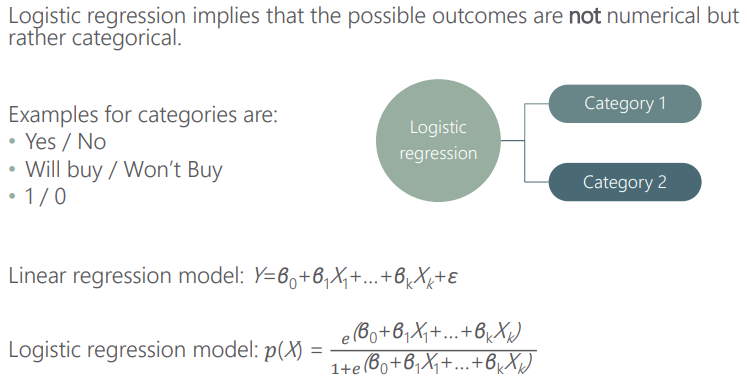 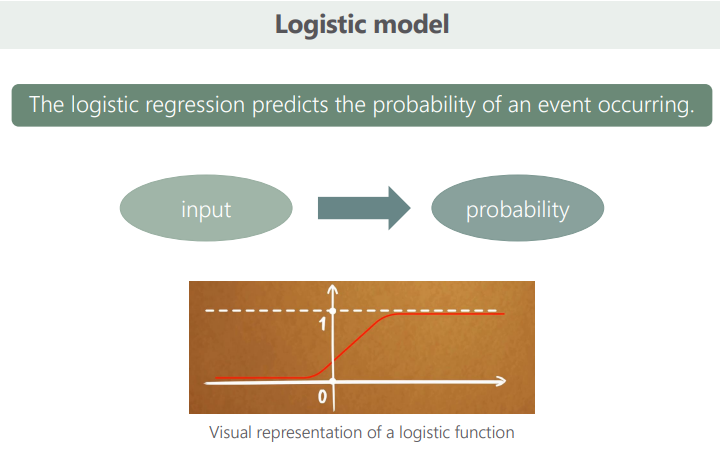 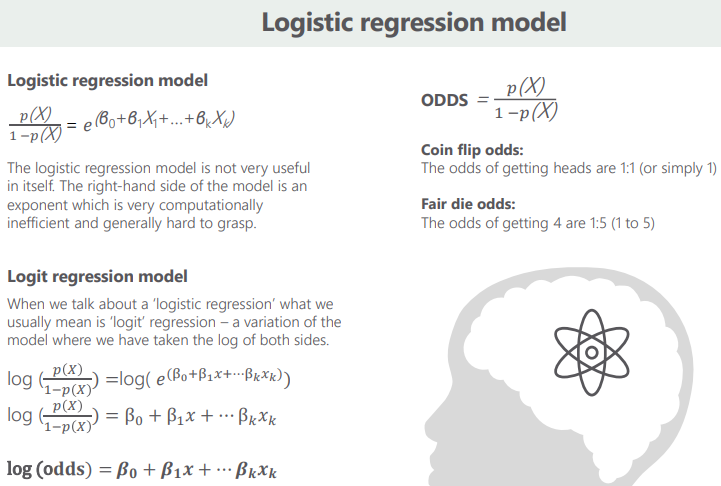 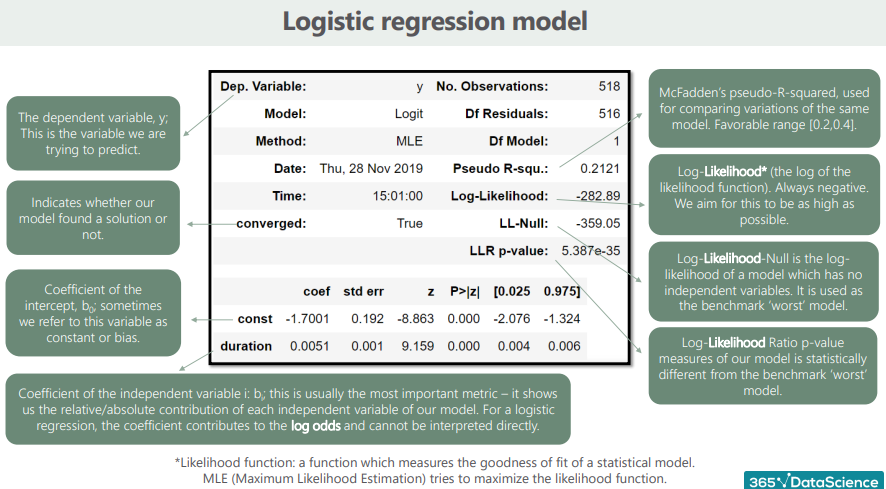


An example of Logistic Regression: Depending on SAT weather a student will admit or not


(168,)
(168,)


Text(0, 0.5, 'Admitted')

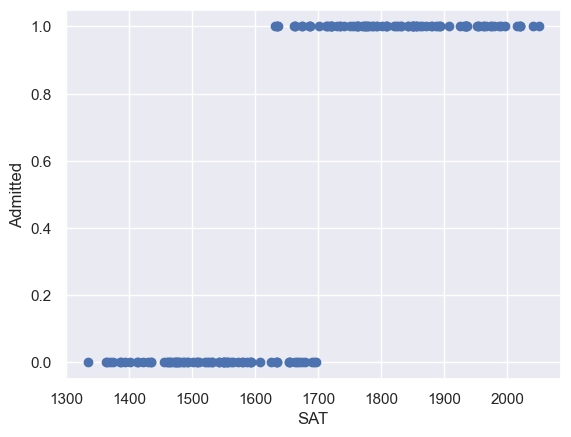

In [118]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# #Load the data
raw_data = pd.read_csv(
    "C:/Users/HP 840 G1/Documents/VS Code Projects/Workspace Learning/DataScience/DataScienceInPython/Drawable/4.Admittance.csv"
)

# #view the data, where each row represents a different student.
# raw_data

# #create dummies for categorial data and store in a new dataframe called data
data = raw_data.copy()
data["Admitted"] = data["Admitted"].map({"Yes": 1, "No": 0})

data
# #Variables
y = data["Admitted"]
x1 = data["SAT"]

print(y.shape)
print(x1.shape)
# #Scatter Plot of the data
plt.scatter(x1, y, c="C0")
plt.xlabel("SAT")
plt.ylabel("Admitted")


## 1.Linear Regression


As we saw that in the scatter plot, there is no linear relationship between the variables so Linear Regression is not appropriate


Text(0, 0.5, 'Admitted')

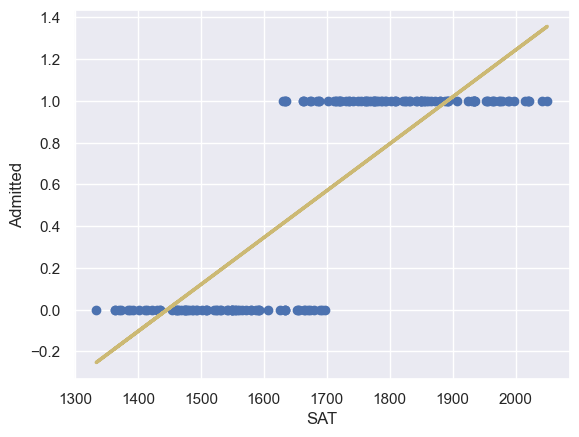

In [119]:
x = sm.add_constant(x1)

reg_linear = sm.OLS(y, x)
results_reg_linear = reg_linear.fit()
print(results_reg_linear)

plt.scatter(x1, y, c="C0")
y_hat = x1 * results_reg_linear.params[1] + results_reg_linear.params[0]

plt.plot(x1, y_hat, lw=2.5, color="C8")
plt.xlabel("SAT")
plt.ylabel("Admitted")
# ####This is not obeying OLS assumptions rule 1. So, no linear regression, we have to apply non-linear regression, for this case Logistic regression.


## 2.Logistic Regression:


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Aug 2023   Pseudo R-squ.:                  0.7992
Time:                        23:06:13   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0

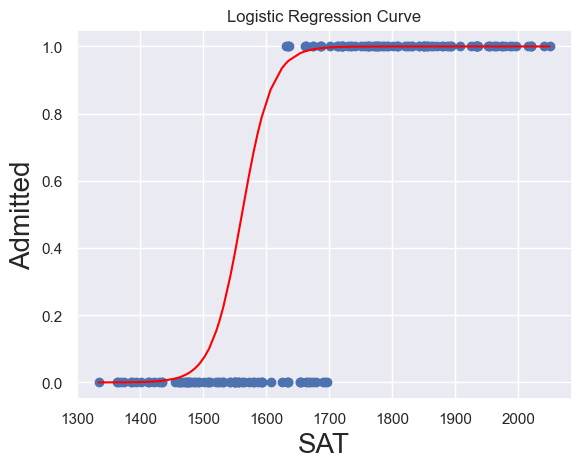

In [120]:
# ###Logit Regression
# ##After fitting the regression, we have some info: Iterations 10, Function value 0.13 means respectively number of iterations to fit the model, the objective function.
# #NOTE: in statmodels library the maximum number of iterations is 35. After that it stops fitting the model.
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log_regre = reg_log.fit()

# ###Logit Regression Summary
print(results_log_regre.summary())


# ###Function that converts the log data into real data
def f(x, b0, b1):
    return np.array(np.exp(b0 + x * b1) / (1 + np.exp(b0 + x * b1)))


f_sorted = np.sort(f(x1, results_log.params[0], results_log_regre.params[1]))
x_sorted = np.sort(np.array(x1))
# ###Plot with a logistic regression curve
plt.title("Logistic Regression Curve")
plt.scatter(x1, y)
plt.plot(x_sorted, f_sorted, c="red")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("Admitted", fontsize=20)
plt.show()
# ###Finally this is a two class MLE problem

Now we will talk about the logit regression summary for better understanding


1. Model Summary
   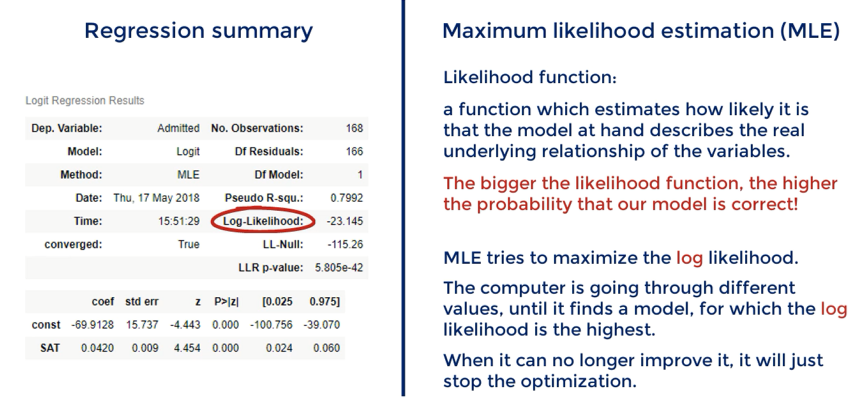 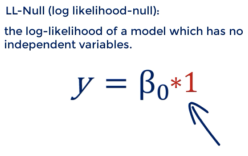 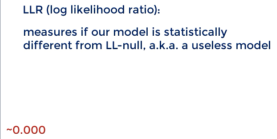 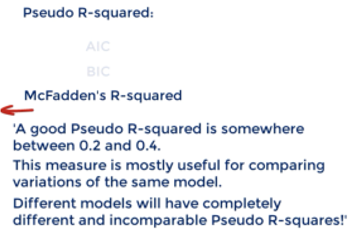
2. Co-efficient Summary
   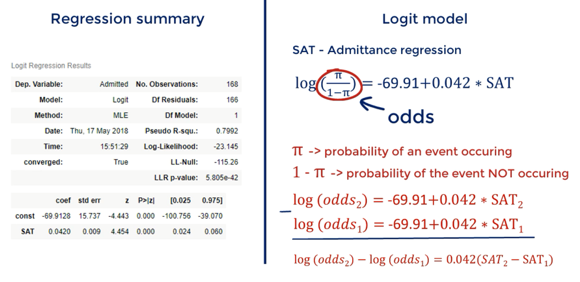 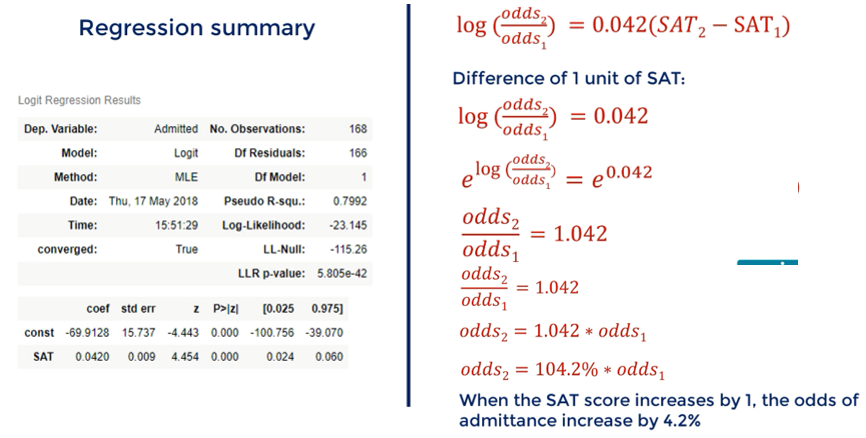 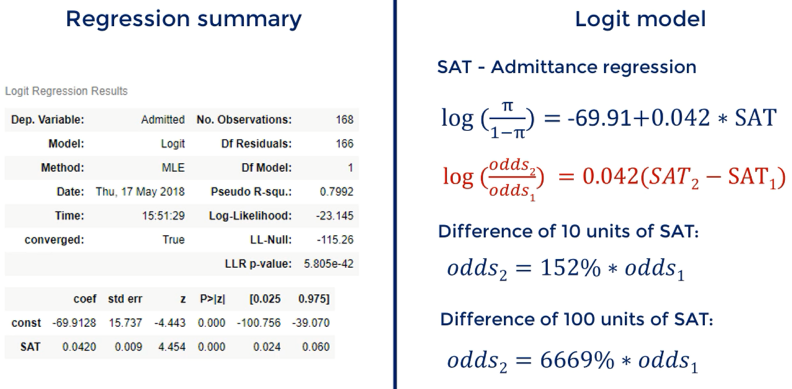


Binary Predictors in Logistic Regression: Ager tay variable chilo 1 ta; SAT. akhon 2 ta variable niye kaj korbo; SAT and Gender.

- Gender er Admitted er relation check korte hobe age
- So, Gender and Admitted er Logistic Regression chalabo
- if p-value is close to 0 then Gender Statistically important
- tokhon Admitted and Gender duita niye Logistic Regression chalabo


      SAT  Admitted  Gender
0    1363         0       0
1    1792         1       1
2    1954         1       1
3    1653         0       0
4    1593         0       0
..    ...       ...     ...
163  1722         1       1
164  1750         1       0
165  1555         0       0
166  1524         0       0
167  1461         0       0

[168 rows x 3 columns]
(168,)
(168,)


Text(0, 0.5, 'Admitted')

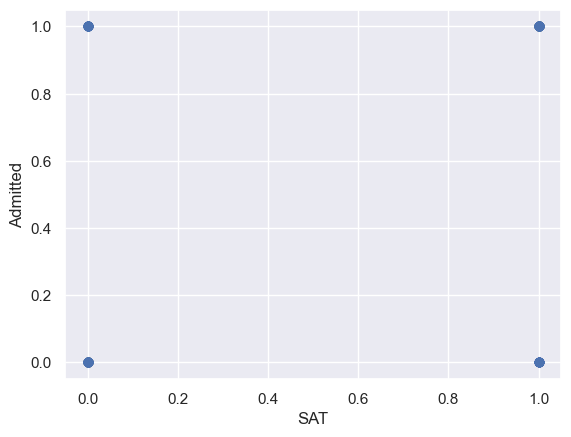

In [121]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# #Load the data
raw_data = pd.read_csv(
    "C:/Users/HP 840 G1/Documents/VS Code Projects/Workspace Learning/DataScience/DataScienceInPython/Drawable/5.Binary_predictors.csv"
)

# #view the data, where each row represents a different student.
# raw_data

# #create dummies for categorial data and store in a new dataframe called data
data = raw_data.copy()
data["Admitted"] = data["Admitted"].map({"Yes": 1, "No": 0})
data["Gender"] = data["Gender"].map({"Female": 1, "Male": 0})

print(data)
# #Variables
y = data["Admitted"]
x1 = data["Gender"]

print(y.shape)
print(x1.shape)
# #Scatter Plot of the data
plt.scatter(x1, y, c="C0")
plt.xlabel("SAT")
plt.ylabel("Admitted")

Checking Gender is important


Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Admitted   No. Observations:                  151
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Aug 2023   Pseudo R-squ.:                  0.8145
Time:                        23:06:14   Log-Likelihood:                -19.312
converged:                       True   LL-Null:                       -104.10
Covariance Type:            nonrobust   LLR p-value:                 1.495e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.5867     16.119     -4.069      0.000     -97.179     -33.995
SAT            0.0389      0.

Text(0, 0.5, 'Admitted')

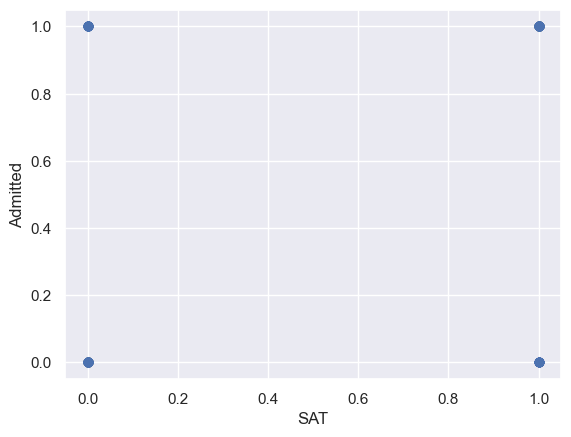

In [122]:
# ###Taking important variable
y = data["Admitted"]
x1 = data["Gender"]

# ###Logistic Variable
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
results_log_regre = reg_log.fit()

# ###Logit Regression Summary of the Gender variable
print(results_log.summary())

# #Scatter Plot of the data
plt.scatter(x1, y, c="C0")
plt.xlabel("SAT")
plt.ylabel("Admitted")

The summary table of Gender
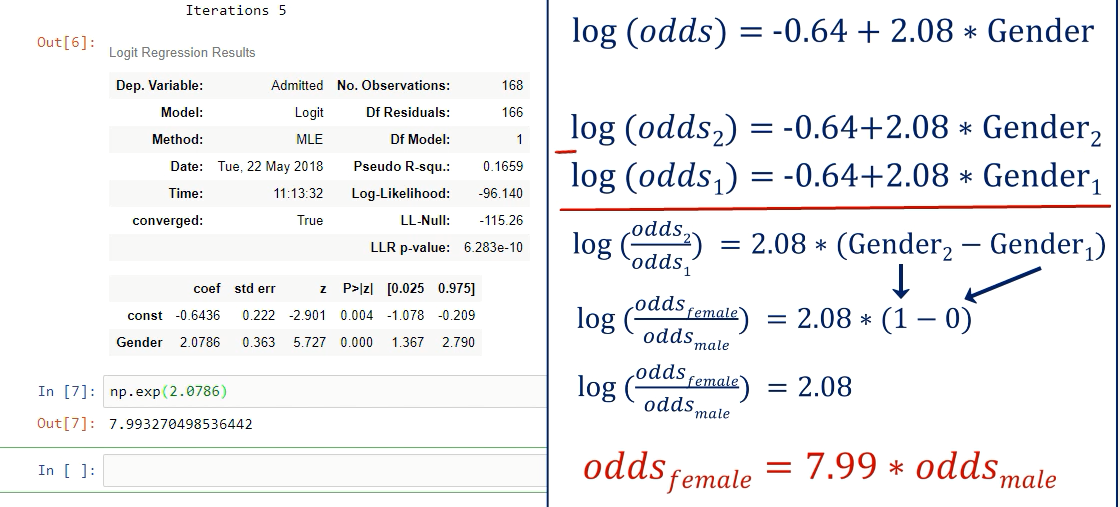


Applying Regression taking both of the variable; SAT and Gender


In [123]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# #Load the data
raw_data = pd.read_csv(
    "C:/Users/HP 840 G1/Documents/VS Code Projects/Workspace Learning/DataScience/DataScienceInPython/Drawable/5.Binary_predictors.csv"
)

# #view the data, where each row represents a different student.
# raw_data

# #create dummies for categorial data and store in a new dataframe called data
data = raw_data.copy()
data["Admitted"] = data["Admitted"].map({"Yes": 1, "No": 0})
data["Gender"] = data["Gender"].map({"Female": 1, "Male": 0})

print(data)
# #Important Variables
y = data["Admitted"]
x1 = data[["SAT", "Gender"]]

# ####to overcome OVERFITTING we use train test split
# ***Now Spliting the Dataset into Training Testing Sets; 90% train, 10% test
x1_train, x1_test, y_train, y_test = train_test_split(
    x1, y, test_size=0.1, shuffle=True, random_state=42
)

# #Logictic Regression
x = sm.add_constant(x1_train)
reg_log = sm.Logit(y_train, x)
results_log_regre = reg_log.fit()

# ###Logit Regression Summary
print(results_log_regre.summary())


# print(y.shape)
# print(x1.shape)
# #Scatter Plot of the data
# plt.scatter(x1, y, c="C0")
# plt.xlabel("SAT")
# plt.ylabel("Admitted")

      SAT  Admitted  Gender
0    1363         0       0
1    1792         1       1
2    1954         1       1
3    1653         0       0
4    1593         0       0
..    ...       ...     ...
163  1722         1       1
164  1750         1       0
165  1555         0       0
166  1524         0       0
167  1461         0       0

[168 rows x 3 columns]
Optimization terminated successfully.
         Current function value: 0.127891
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               Admitted   No. Observations:                  151
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Aug 2023   Pseudo R-squ.:                  0.8145
Time:                        23:06:14   Log-Likelihood:                -19.312
converged:                       True   LL-Null:               

Taking both SAT and Gender, here we see that:

Log-likelihood is much better

Psudo R-squared is also closer to 1

Which means this is a better Logistic Regression
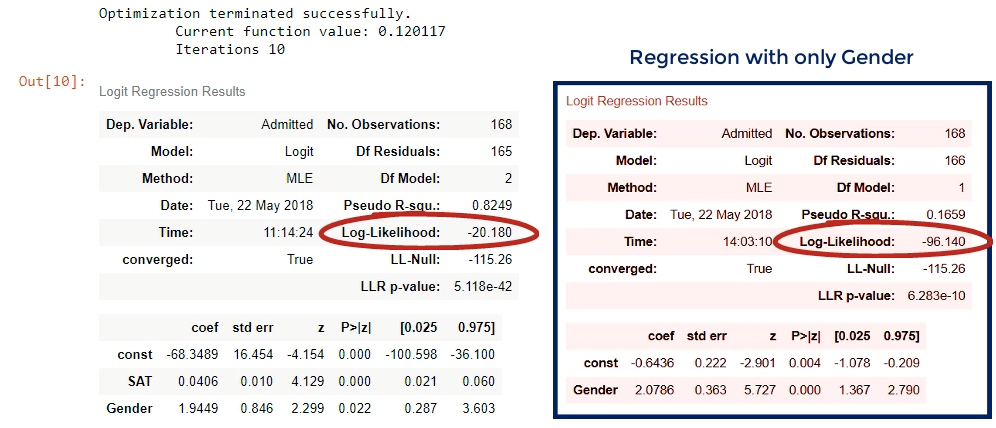


Model Accuracy Discussion


In [124]:
# #As we have real value and predicted values we can figure out the accuracy
# ##Predicted value by the logistic regression
y_pred = results_log_regre.predict().round(2)
print(y_pred)
# ##here the list of probability of getting admitted. we will assume 0.5>= as admitted and otherwise not admitted

# ###Real values of the data
print(y)

# ###Confusion Matrix
# print(results_log.pred_table())

# ##Lets format CM for better understanding
cm_df = pd.DataFrame(results_log_regre.pred_table())
cm_df.columns = ["Predicted 0", "Predicted 1"]
cm_df = cm_df.rename(index={0: "Actual 0", 1: "Actual 1"})

print(cm_df)

# ###Accuracy of traing
cm = np.array(cm_df)
accuracy_train = (cm[0, 0] + cm[1, 1]) / cm.sum()
print("Accuracy of the training = {:.3f}".format(accuracy_train))


[0.   1.   0.   1.   0.11 0.83 0.51 0.76 0.02 1.   0.99 0.   0.   1.
 0.34 0.   0.3  0.   1.   1.   0.96 0.   1.   0.82 0.08 0.49 1.   0.
 0.04 0.   0.29 0.98 0.   0.   1.   1.   1.   0.   1.   1.   0.99 1.
 0.06 0.21 0.46 0.02 0.99 0.23 0.   0.52 1.   1.   1.   0.   0.   0.
 0.   0.98 0.99 1.   1.   0.02 0.74 1.   0.01 0.   1.   1.   1.   0.
 0.   0.   0.   0.97 0.99 0.   0.5  0.74 0.98 1.   1.   1.   0.   1.
 0.   0.01 0.   0.03 0.99 0.01 0.21 0.   0.01 1.   0.   0.28 1.   0.99
 1.   0.   0.74 0.   0.02 0.   0.85 1.   1.   0.88 1.   0.02 1.   0.
 1.   1.   0.11 0.   0.   0.01 1.   1.   1.   1.   0.   0.01 0.11 0.
 1.   1.   0.98 0.99 0.84 1.   0.04 1.   0.92 0.64 0.82 1.   0.01 0.95
 0.97 1.   1.   0.01 0.   1.   0.11 0.99 0.55 0.98 1.  ]
0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64
          Predicted 0  Predicted 1
Actual 0         64.0          5.0
Actual 1          5.0         77.0
Acc

The Confusion Matrix

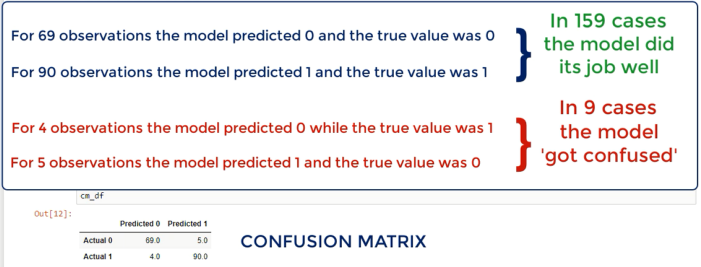


Model Testing and assessing its accuracy


In [128]:
# ##initializing test data and resetting the index
x1_test = x1_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

x_test = sm.add_constant(x1_test)

# print(x_test)


# ###A function that describes confusion matrix
def confusion_matrix(test_data_x, test_actual_y, model):
    pred_values = model.predict(test_data_x)
    # print(pred_values)
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(test_actual_y, pred_values, bins=bins)[0]
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    return cm, accuracy


# ###Testing accuracy
cm, accuracy = confusion_matrix(x_test, y_test, results_log_regre)

# ##Lets format CM for better understanding
cm_df = pd.DataFrame(cm)
cm_df.columns = ["Predicted 0", "Predicted 1"]
cm_df = cm_df.rename(index={0: "Actual 0", 1: "Actual 1"})

print(cm_df)

print("Model Accuracy = {:.3f}".format(accuracy))
print("Model Misclassification Rate = {:.3f}".format(1 / 17))

          Predicted 0  Predicted 1
Actual 0          5.0          0.0
Actual 1          1.0         11.0
Model Accuracy = 0.941
Model Misclassification Rate = 0.059
